# Table of Contents
1. Introduction
2. Import
3. Analysis & Preprocessing
4. Model
5. Training
6. Analysis & Conclusion

# 1. Introduction
References:
- https://machinelearningmastery.com/feature-selection-for-regression-data/
- https://www.analyticsvidhya.com/blog/2021/08/a-walk-through-of-regression-analysis-using-artificial-neural-networks-in-tensorflow/
- https://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/
- https://thinkingneuron.com/using-artificial-neural-networks-for-regression-in-python/
- https://www.studytonight.com/post/what-is-mean-squared-error-mean-absolute-error-root-mean-squared-error-and-r-squared#:~:text=MAE%3A%20It%20is%20not%20very,the%20weighted%20individual%20differences%20equally.

# 2. Import


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from matplotlib import pyplot
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils, callbacks
from tensorflow.keras.losses import MeanSquaredLogarithmicError
import matplotlib.pyplot as plt
import numpy as np 
import sklearn.metrics as metrics

# 3. Analysis & Preprocessing

In [3]:
data = pd.read_excel('../../data_sets/Volumetric_features.xlsx')
data_feat = pd.DataFrame(data, columns = data.columns[:-1])
data_feat = data_feat.drop(['S.No','Age'], axis=1)

data.head(5)
data.describe()

,S.No,Left-Lateral-Ventricle,Left-Inf-Lat-Vent,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus,Left-Caudate,Left-Putamen,Left-Pallidum,3rd-Ventricle,...,rh_supramarginal_thickness,rh_frontalpole_thickness,rh_temporalpole_thickness,rh_transversetemporal_thickness,rh_insula_thickness,rh_MeanThickness_thickness,BrainSegVolNotVent.2,eTIV.1,Age,dataset
count,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,...,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4.226000e+03,4.226000e+03,4226.000000,4226.000000
mean,2113.500000,13370.040795,574.849716,14646.696711,52002.811571,7164.947539,3337.653526,4505.158755,1958.214458,1418.947373,...,2.429779,2.684327,3.555803,2.288283,2.846123,2.372266,1.085468e+06,1.514925e+06,58.374586,4.533838
std,1220.085448,9194.928348,594.590387,2622.868798,6378.435917,1207.229615,502.352001,713.658580,287.139826,635.143286,...,0.185543,0.275245,0.332094,0.269851,0.195038,0.146944,1.248881e+05,1.651798e+05,20.064099,3.057928
min,1.000000,2204.100000,0.000000,6920.100000,29911.800000,4145.400000,1035.600000,2294.000000,851.900000,39.700000,...,1.345000,1.655000,1.940000,1.176000,1.533000,1.483290,6.279600e+05,8.329815e+05,18.000000,1.000000
25%,1057.250000,7031.625000,243.200000,12909.875000,47359.675000,6239.425000,2984.500000,4008.125000,1764.700000,941.825000,...,2.309000,2.510000,3.360000,2.105000,2.720000,2.274935,9.957585e+05,1.404471e+06,43.000000,1.000000
50%,2113.500000,10669.950000,385.800000,14277.000000,51333.650000,7032.150000,3294.050000,4438.100000,1940.100000,1225.450000,...,2.440500,2.685000,3.586500,2.297000,2.851000,2.383375,1.075919e+06,1.511767e+06,61.000000,4.000000
75%,3169.750000,17332.650000,720.825000,15959.725000,56287.775000,7977.400000,3655.125000,4963.025000,2128.000000,1780.225000,...,2.562750,2.851000,3.790000,2.476000,2.975000,2.483142,1.168888e+06,1.625445e+06,76.000000,8.000000
max,4226.000000,79812.500000,7533.800000,35042.500000,79948.200000,13008.300000,6018.000000,8446.100000,4357.700000,4461.600000,...,2.996000,3.928000,4.487000,3.123000,3.482000,2.803730,1.545129e+06,2.075213e+06,96.000000,9.000000


In [4]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = scaler.fit_transform(data)
n = 20
pca = PCA(n_components=n)
pca_data = pca.fit_transform(x)

labels = data.columns.values.tolist()
label_index = [np.abs(pca.components_[i]).argmax() for i in range(n)]
columns = [labels[label_index[i]] for i in range(n)]

pca_df = pd.DataFrame(data=pca_data, columns=columns)
print(pca_df.head)
pca_df.head()

<bound method NDFrame.head of       rh_MeanThickness_thickness  CerebralWhiteMatterVol  \
0                       2.116693                1.364190   
1                       1.781763                1.577275   
2                       2.423065                1.424485   
3                       4.657487                1.366376   
4                       3.795704                1.701512   
...                          ...                     ...   
4221                    3.332053                2.220377   
4222                    4.258130               -2.535943   
4223                    7.826457                2.169782   
4224                   -0.702316                2.439426   
4225                   -2.373678               -3.566136   

      Left-Lateral-Ventricle  lh_lateralorbitofrontal_thickness  SurfaceHoles  \
0                   1.509735                          -2.002578     -1.881492   
1                   1.751892                          -1.118331     -1.487501   
2     

,rh_MeanThickness_thickness,CerebralWhiteMatterVol,Left-Lateral-Ventricle,lh_lateralorbitofrontal_thickness,SurfaceHoles,CC_Posterior,rh_entorhinal_thickness,CC_Posterior,Right-Caudate,MaskVol-to-eTIV,rh_frontalpole_thickness,MaskVol-to-eTIV,Right-Cerebellum-White-Matter,MaskVol-to-eTIV,Right-vessel,non-WM-hypointensities,rh_isthmuscingulate_thickness,5th-Ventricle,Right-vessel,non-WM-hypointensities
0,2.116693,1.364190,1.509735,-2.002578,-1.881492,2.276572,-1.645030,-0.009227,-0.467878,1.780338,-0.678076,0.104236,-1.136586,1.557921,-1.217632,-0.361074,0.093541,-0.607278,-0.254079,0.364582
1,1.781763,1.577275,1.751892,-1.118331,-1.487501,2.076867,-1.810514,-0.369168,-0.924453,1.963588,-0.608463,0.532925,-0.925209,1.449863,-1.664904,-0.732255,-0.454900,-0.178368,-0.309817,0.624537
2,2.423065,1.424485,1.583649,-1.542496,-1.247366,1.777017,-2.451846,-0.641076,-1.269868,1.752599,-0.742285,0.507290,-0.505602,1.736077,-1.242800,-0.778175,-0.224387,0.163232,-0.041908,0.119473
3,4.657487,1.366376,1.174538,-0.636979,-1.460461,2.257651,-1.233161,-0.938898,-1.098905,1.541935,-0.560708,-0.000520,-0.535672,1.803339,-1.700276,-0.218092,-0.398867,-0.112105,-0.065013,0.098741
4,3.795704,1.701512,2.226901,-1.242589,-1.389941,2.822799,-1.680302,-0.281152,-0.694993,1.776571,-0.838985,0.372740,-1.032947,2.091808,-0.938495,-0.633126,-0.571152,-0.583998,-0.215627,0.704340


In [ ]:
# Split for validation --> train, val, test = 80/15/5
# train to test (val and test) --> include random shuffle
x_train, x_validation, y_train, y_validation = train_test_split(pca_df, data['Age'], test_size=0.20, random_state=33)

# (20% of total dataset -> 75% validation = 15% total, 25% validation = 5% total
# val and test --> include random shuffle
x_val, x_test, y_val, y_test = train_test_split(x_validation, y_validation, test_size=0.25, random_state=33)

print("x_train shape is:",x_train.shape)
print("y_train shape is:",y_train.shape, "\n")
print("x_val shape is:",x_val.shape)
print("y_val shape is:",y_val.shape, "\n")
print("x_test shape is:",x_test.shape)
print("y_test shape is:",y_test.shape)

In [20]:
# end with 3 neurons for each class --> 1 (Normal), 2 (Suspect) and 3 (Pathological)
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=x_train.shape[1], name='input'))
model.add(tf.keras.layers.Dense(32))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dense(16))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dense(8))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dense(4))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dense(1, activation='linear', name='output'))


opt = Adam(learning_rate=0.001)

model.compile(
            loss='mean_absolute_error',
            optimizer=opt,
            metrics= ['mean_absolute_error']
            )

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 32)                672       
                                                                 
 activation_10 (Activation)  (None, 32)                0         
                                                                 
 dense_11 (Dense)            (None, 16)                528       
                                                                 
 activation_11 (Activation)  (None, 16)                0         
                                                                 
 dense_12 (Dense)            (None, 8)                 136       
                                                                 
 activation_12 (Activation)  (None, 8)                 0         
                                                                 
 dense_13 (Dense)            (None, 4)                

In [21]:
earlystopping = callbacks.EarlyStopping(monitor="val_loss", mode="min", 
                                        patience=10, restore_best_weights = True)

In [22]:
# loss function
msle = MeanSquaredLogarithmicError()

model.compile(
    loss=msle, 
    optimizer=Adam(learning_rate=0.001), 
    metrics=['msle']
)
# train the model
hist = model.fit(
    x_train, 
    y_train, 
    epochs=100, 
    batch_size=64,
    validation_data=(x_val, y_val), 
    callbacks = [earlystopping]
)

Epoch 1/100


2022-04-09 15:53:23.010687: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


53/53 [==============================] - ETA: 0s - loss: 11.2678 - msle: 11.2678

2022-04-09 15:53:25.789472: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


53/53 [==============================] - 4s 43ms/step - loss: 11.2678 - msle: 11.2678 - val_loss: 7.3187 - val_msle: 7.3187
Epoch 2/100
53/53 [==============================] - 2s 33ms/step - loss: 5.0874 - msle: 5.0874 - val_loss: 3.0893 - val_msle: 3.0893
Epoch 3/100
53/53 [==============================] - 1s 28ms/step - loss: 2.1620 - msle: 2.1620 - val_loss: 1.3176 - val_msle: 1.3176
Epoch 4/100
53/53 [==============================] - 2s 34ms/step - loss: 0.9247 - msle: 0.9247 - val_loss: 0.5591 - val_msle: 0.5591
Epoch 5/100
53/53 [==============================] - 3s 50ms/step - loss: 0.4319 - msle: 0.4319 - val_loss: 0.3007 - val_msle: 0.3007
Epoch 6/100
53/53 [==============================] - 2s 42ms/step - loss: 0.2587 - msle: 0.2587 - val_loss: 0.2069 - val_msle: 0.2069
Epoch 7/100
53/53 [==============================] - 2s 35ms/step - loss: 0.1901 - msle: 0.1901 - val_loss: 0.1682 - val_msle: 0.1682
Epoch 8/100
53/53 [==============================] - 2s 29ms/step - loss

Epoch 62/100
53/53 [==============================] - 1s 26ms/step - loss: 0.0309 - msle: 0.0309 - val_loss: 0.0388 - val_msle: 0.0388
Epoch 63/100
53/53 [==============================] - 2s 32ms/step - loss: 0.0304 - msle: 0.0304 - val_loss: 0.0391 - val_msle: 0.0391
Epoch 64/100
53/53 [==============================] - 1s 28ms/step - loss: 0.0299 - msle: 0.0299 - val_loss: 0.0380 - val_msle: 0.0380
Epoch 65/100
53/53 [==============================] - 2s 35ms/step - loss: 0.0294 - msle: 0.0294 - val_loss: 0.0380 - val_msle: 0.0380
Epoch 66/100
53/53 [==============================] - 1s 25ms/step - loss: 0.0289 - msle: 0.0289 - val_loss: 0.0373 - val_msle: 0.0373
Epoch 67/100
53/53 [==============================] - 1s 24ms/step - loss: 0.0286 - msle: 0.0286 - val_loss: 0.0368 - val_msle: 0.0368
Epoch 68/100
53/53 [==============================] - 1s 23ms/step - loss: 0.0282 - msle: 0.0282 - val_loss: 0.0366 - val_msle: 0.0366
Epoch 69/100
53/53 [==============================] - 1

In [25]:
y_pred = model.predict(x_test)

print("Explained variance: " + str(metrics.explained_variance_score(y_test, y_pred)))
print("Max Error: " + str(metrics.max_error(y_test, y_pred)))
print("Mean absolute error: " + str(metrics.mean_absolute_error(y_test, y_pred)))
print("Mean squared error: " + str(metrics.mean_squared_error(y_test, y_pred)))
print("Root Mean squared error: " + str(metrics.mean_squared_error(y_test, y_pred, squared=False)))
print("R2: " + str(metrics.r2_score(y_test, y_pred)))

Explained variance: 0.8473461210171332
Max Error: 24.898300170898438
Mean absolute error: 5.875638134074661
Mean squared error: 60.81557534441183
Root Mean squared error: 7.798434159779246
R2: 0.8448933359187755


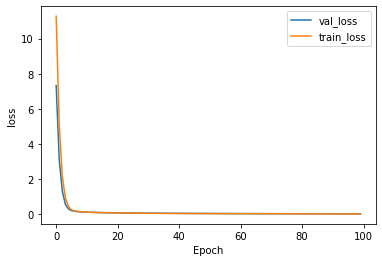

In [27]:
x = list(range(100))
vy = hist.history['val_loss']
ty = hist.history['loss']

plt.plot( x, vy, label='val_loss')
plt.plot( x, ty, label='train_loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.show()